In [5]:
import pandas as pd 
import numpy as np
from prophet import Prophet
import datetime
%matplotlib notebook
import matplotlib.pyplot as plt


In [6]:
revenue_df = pd.read_csv('rev.csv', index_col = 0)
revenue_df.head()

,date,rev,discount
0,2019-01-01,8.603315e+05,512860.0
1,2019-01-02,1.494803e+06,864634.0
2,2019-01-03,1.004543e+06,397134.0
3,2019-01-04,1.011044e+06,361481.0
4,2019-01-05,1.025176e+06,408829.0


## Plot the time series of total discounts. So we can find campaign days and exclude anomaly revenues from our model

<IPython.core.display.Javascript object>


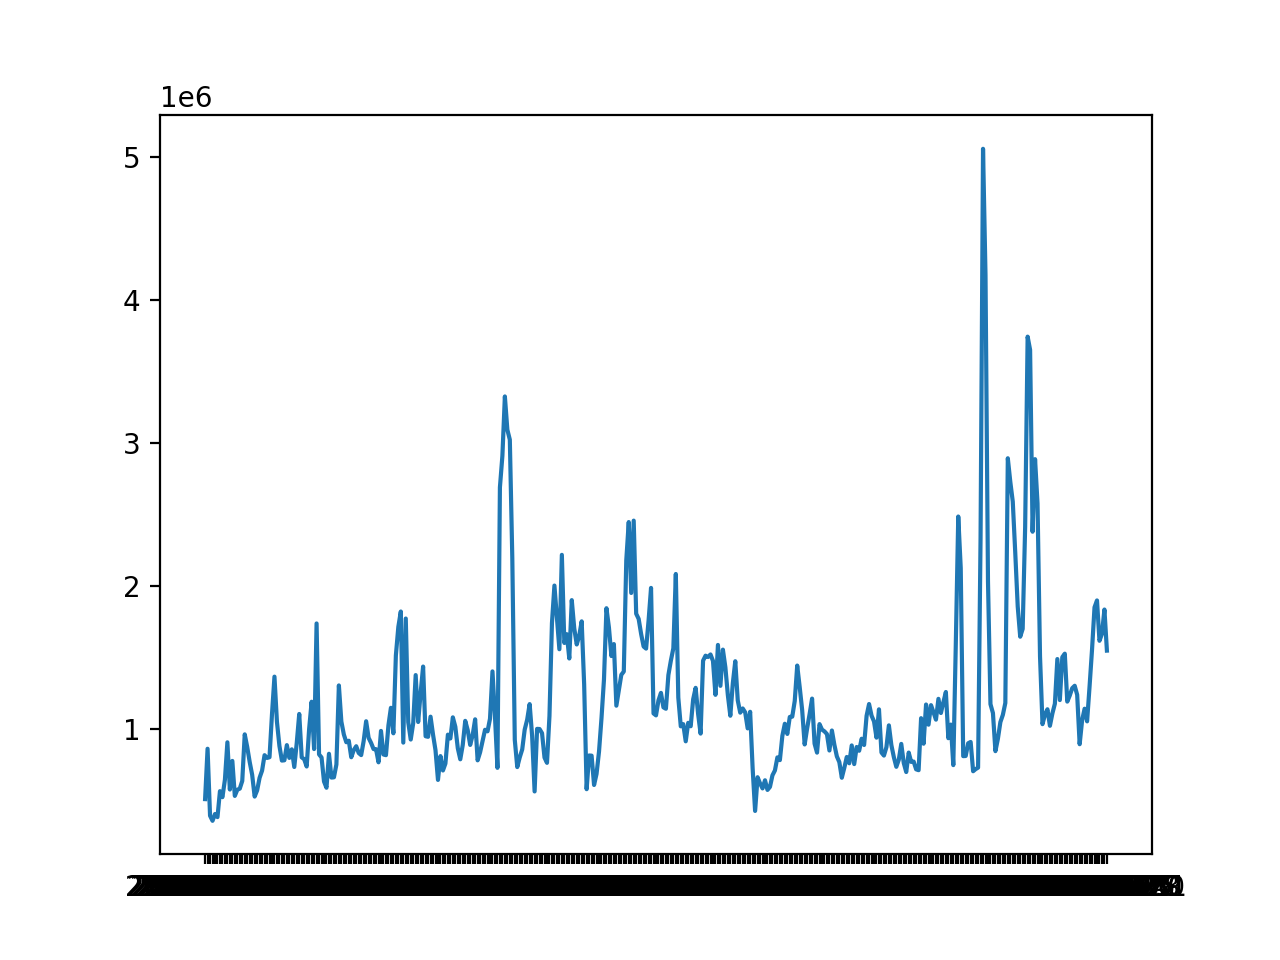

In [7]:
plt.plot(revenue_df['date'], revenue_df['discount'])
revenue_df = revenue_df.drop(columns = ['discount'])

In [8]:
revenue_df = revenue_df.rename(columns = {'date':'ds', 'rev': 'y'})
revenue_df = revenue_df.sort_values(by = 'ds')
revenue_df.head(10)

,ds,y
0,2019-01-01,8.603315e+05
1,2019-01-02,1.494803e+06
2,2019-01-03,1.004543e+06
3,2019-01-04,1.011044e+06
4,2019-01-05,1.025176e+06
5,2019-01-06,9.963863e+05
6,2019-01-07,1.168613e+06
7,2019-01-08,1.094639e+06
8,2019-01-09,1.335641e+06
9,2019-01-10,1.545129e+06


In [9]:

campaign_days = pd.DataFrame({
  'holiday': 'campaign_week',
  'ds': pd.to_datetime([
      '2019-05-01', '2019-11-01', '2019-11-11', '2019-11-22', '2019-11-29'
  ]),
})






In [10]:
forecast = Prophet(changepoint_prior_scale = 0.001, yearly_seasonality = True, holidays = campaign_days)
forecast.fit(revenue_df)

future = forecast.make_future_dataframe(periods = (30))

results = forecast.predict(future)
results[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,1.070009e+06,73547.519886,2.051232e+06
1,2019-01-02,1.180327e+06,241645.925841,2.181567e+06
2,2019-01-03,1.312933e+06,377810.040178,2.304830e+06
3,2019-01-04,1.316438e+06,384853.543303,2.322040e+06
4,2019-01-05,1.330909e+06,333007.854244,2.364153e+06


<IPython.core.display.Javascript object>


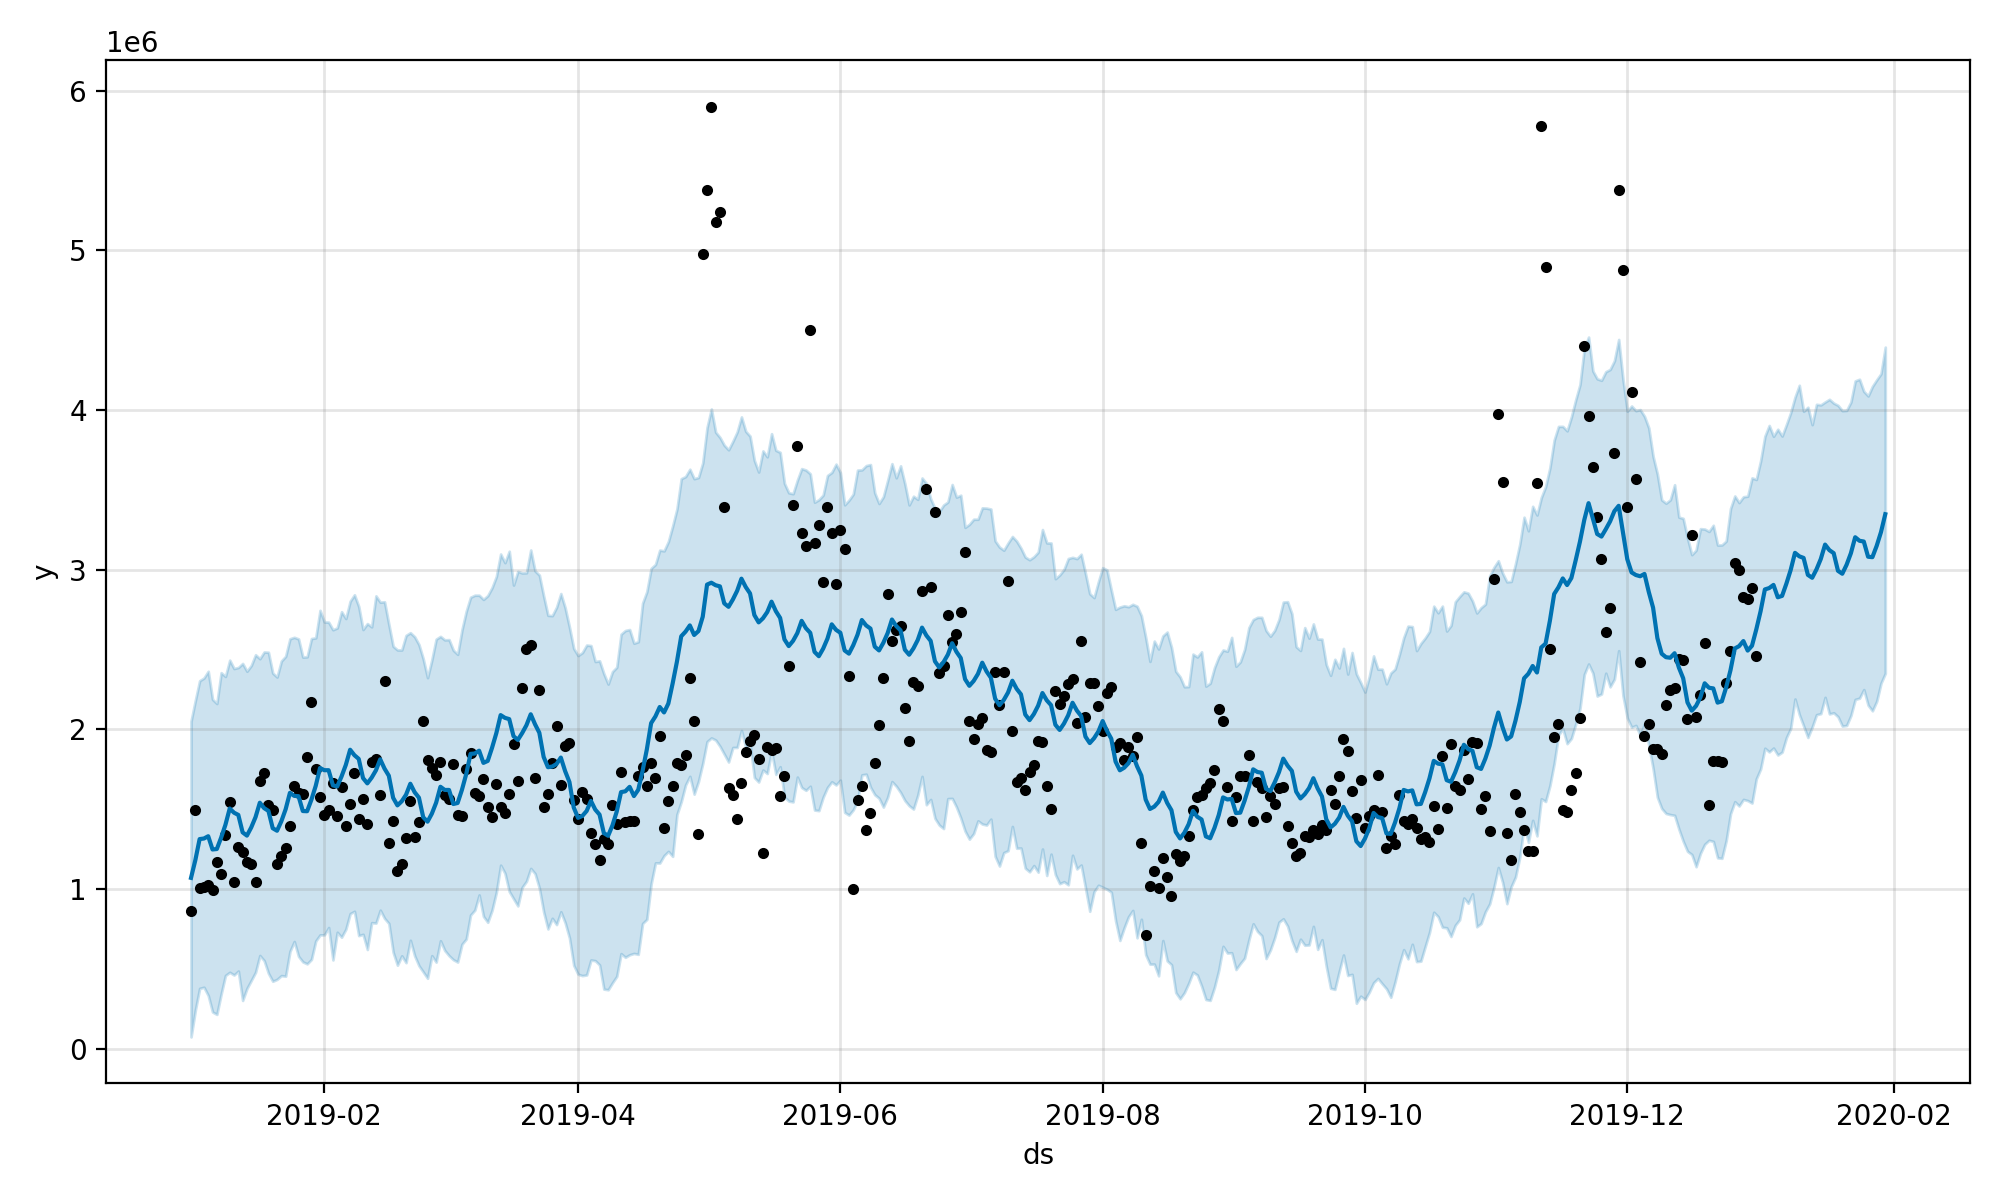

In [11]:
fig1 = forecast.plot(results)

<IPython.core.display.Javascript object>


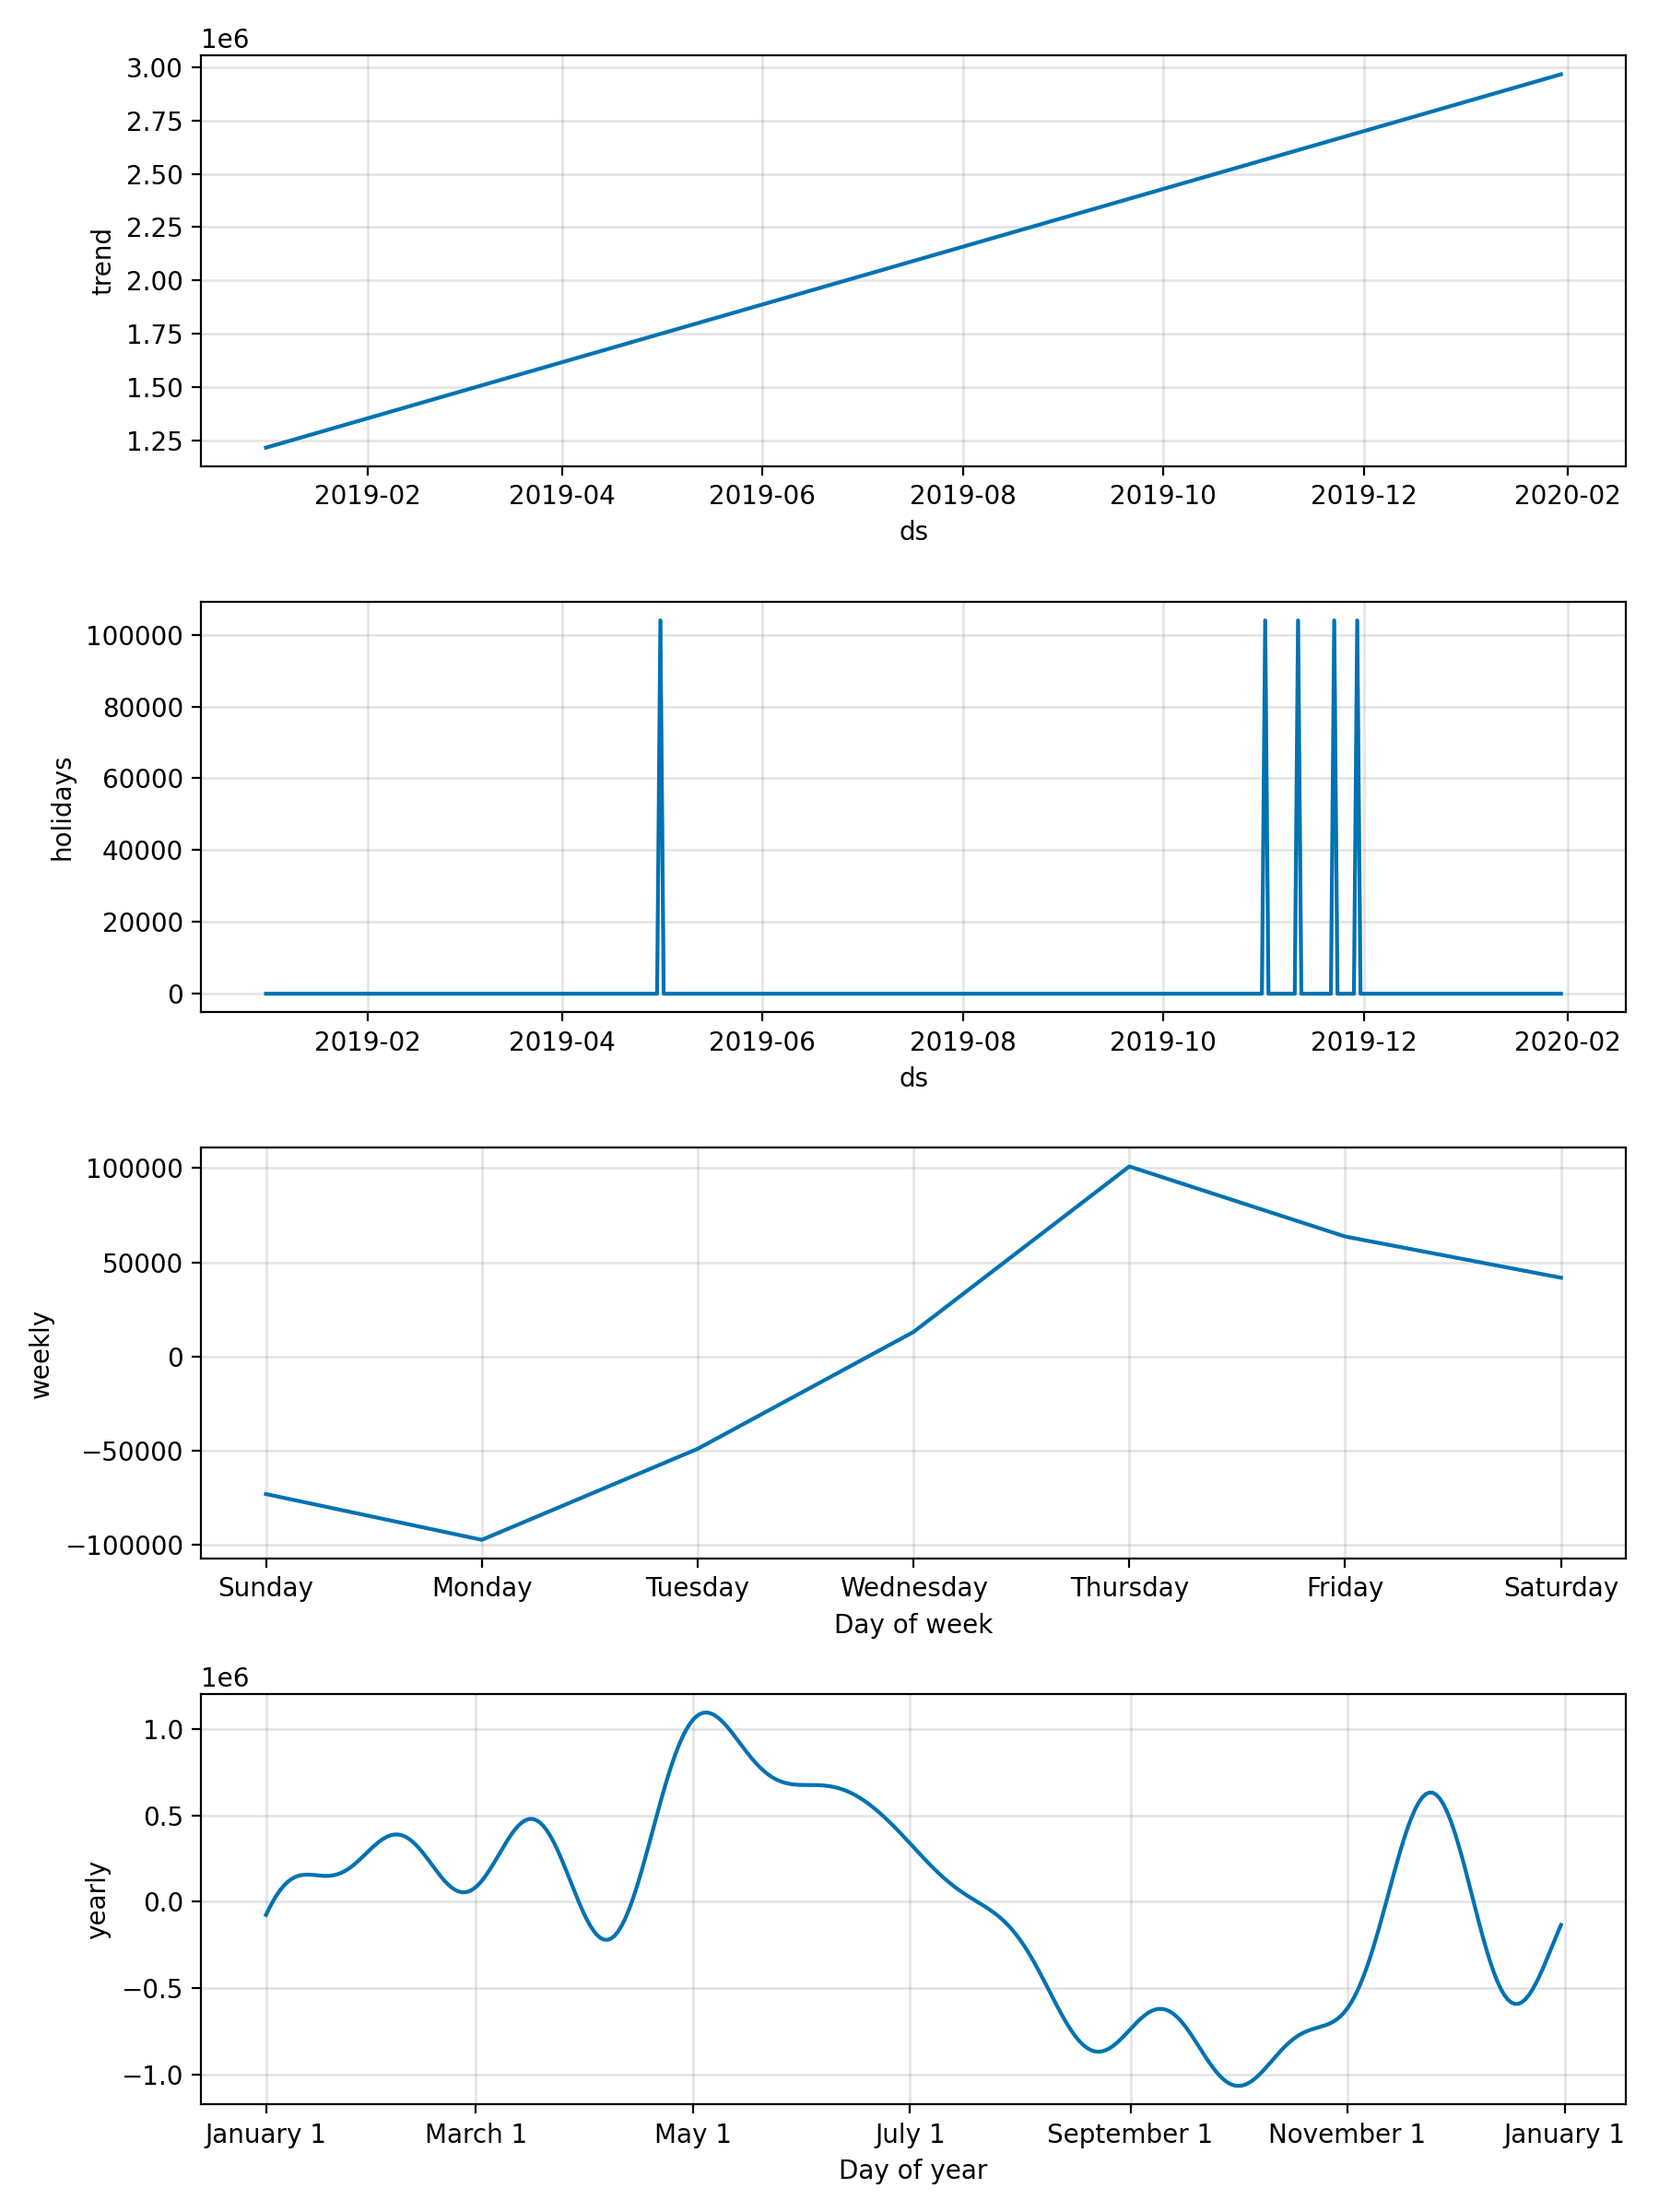

In [12]:
fig2 = forecast.plot_components(results)

In [14]:
results[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(30)

,ds,yhat_lower,yhat,yhat_upper
365,2020-01-01,1.752263e+06,2.739896e+06,3.681972e+06
366,2020-01-02,1.882112e+06,2.876809e+06,3.836685e+06
367,2020-01-03,1.859182e+06,2.885252e+06,3.903831e+06
368,2020-01-04,1.883040e+06,2.905113e+06,3.836171e+06
369,2020-01-05,1.839769e+06,2.827701e+06,3.880156e+06
370,2020-01-06,1.857610e+06,2.836320e+06,3.837738e+06
371,2020-01-07,1.948590e+06,2.912965e+06,3.909409e+06
372,2020-01-08,2.006897e+06,2.998789e+06,3.984694e+06
373,2020-01-09,2.190357e+06,3.106079e+06,4.081035e+06
374,2020-01-10,2.092723e+06,3.084248e+06,4.155431e+06


In [15]:
results[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].to_csv('revenue_forecast.csv')